In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Linux
# !pip install underthesea --python=python3.11
!pip install underthesea
!pip install transformers

In [3]:
from underthesea import word_tokenize

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from transformers import AutoModel, AutoTokenizer

import matplotlib.pyplot as plt
import re

# **Lấy mẫu lần nữa**

In [4]:
# df = pd.read_csv('../data/cleaned_data.csv')
df = pd.read_csv('/content/drive/MyDrive/data/cleaned_data.csv')
df.head()

,URL,Title,Abstract,Content,Category,num_words
0,https://vnexpress.net/biet-thu-lien-ke-duoi-5-...,biệt thự liền kề dưới 5 tỷ sẽ dần khan hiếm b...,tp hcm hai năm tới thành phố có thể không còn ...,trong báo cáo thị trường mới đây hãng tư vấn d...,bất động sản,600
1,https://tuoitre.vn/nha-dau-tu-hai-long-khi-tai...,nhà đầu tư hài lòng khi tài sản cho thuê được ...,trở về từ chuyến khảo sát phú quốc chị thu tra...,nắm bắt cơ hội đầu tư hơn 2 năm nay tôi đầu tư...,bất động sản,755
2,https://tuoitre.vn/tinh-nghe-an-noi-gi-ve-du-a...,tỉnh nghệ an nói gì về dự án công viên nghĩa t...,tto đây là công viên nghĩa trang sinh thái vĩ...,ngày 3112 ubnd tỉnh nghệ an có thông tin tới c...,bất động sản,507
3,https://tuoitre.vn/hang-xom-chung-cu-lexington...,hàng xóm chung cư lexington cũng chưa có sổ vì...,cư dân ở chung cư petrovietnam landmark tp thủ...,theo tìm hiểu củatuổi trẻ online dự án đường l...,bất động sản,673
4,https://tuoitre.vn/uc-doi-mat-cuoc-khung-hoang...,úc đối mặt cuộc khủng hoảng nhà cho thuê tồi t...,giá cho thuê nhà tăng mạnh đã và đang ảnh hưởn...,theo phóng viên ttxvn tại sydney báo cáo về kh...,bất động sản,559


In [5]:
df_sorted = df.sort_values(by=['Category', 'num_words'])
df = df_sorted.groupby('Category').head(5000)

# **Gộp thể loại**

In [6]:
# df = pd.read_csv('../data/cleaned_data.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/cleaned_data.csv')
df.head()

,URL,Title,Abstract,Content,Category,num_words
3740,https://tuoitre.vn/10-cach-trang-tri-nha-de-la...,10 cách trang trí nhà dễ làm dịp halloween 2017,tto halloween luôn được người phương tây chú ...,dưới đây là một số cách trang trí đơn giản dễ ...,bất động sản,21
5509,https://tuoitre.vn/bien-phong-tam-thanh-noi-xa...,biến phòng tắm thành nơi xả stress sau một ngà...,tto phòng tắm chính là một trong những nơi qu...,những cách sau giúp phòng tắm luôn sạch sẽ bắt...,bất động sản,21
7429,https://tuoitre.vn/12-mau-trang-hoang-giang-si...,12 mẫu trang hoàng giáng sinh dễ làm tại nhà,tto giáng sinh đang đến rất gần đây là thời đ...,dưới đây là 12 mẫu trang hoàng giáng sinh dễ l...,bất động sản,22
4721,https://vnexpress.net/can-ho-thiet-ke-nhu-mot-...,căn hộ thiết kế như một khu rừng thiền báo vn...,hà nội một khu rừng nhỏ được bố trí ở trung tâ...,thu hươngnhóm thiết kế nguyễn dương minh nhật ...,bất động sản,24
7182,https://tuoitre.vn/thanh-thanh-cong-hop-tac-vo...,thành thành công hợp tác với công ty tây nam,tt ngày 204 tại tphcm công ty cp đầu tư thành...,trong đó hai bên cùng hợp tác để phát triển hệ...,bất động sản,24


# **Phân đoạn văn bản**

In [7]:
def segmented_text(text):
    return word_tokenize(text, format="text")

In [ ]:
cols = ['Title', 'Abstract', 'Content']
df.loc[:, cols] = df[cols].astype(str).apply(lambda col: col.apply(segmented_text))
df.sample(5)

In [ ]:
df = df.drop('num_words', axis=1)
df.to_csv('/content/drive/MyDrive/data/segmented_data.csv', index=False, encoding='utf-8')
# df.to_csv('../data/segmented_data.csv', index=False, encoding='utf-8')

# **Train/validation/test**

In [9]:
df = pd.read_csv('/content/drive/MyDrive/data/segmented_data.csv')
df.sample(5)

,URL,Title,Abstract,Content,Category
48554,https://tuoitre.vn/tphcm-se-loai-bo-co-so-san-...,tphcm sẽ loại_bỏ cơ_sở sản_xuất vlxd gây ô_nhiễm,tto ngày 3010 tại bình_phước sở xây_dựng tphcm...,ông phan_đức_nhạn phó giám_đốc sở xây_dựng tph...,thời sự
17208,https://tuoitre.vn/giao-luu-trang-bi-ky-nang-s...,giao_lưu trang_bị kỹ_năng sống cho phạm_nhân,tto trong khuôn_khổ chương_trình bài ca hi_vọn...,tại buổi giao_lưu các bạn đoàn_viên thanh_niên...,giới trẻ
34465,https://tuoitre.vn/camera-ghi-hinh-nguoi-dan-o...,camera ghi_hình người đàn_ông nửa_đêm đột_nhập...,sau 2 giờ vào nhà yến kẻ_trộm đã lấy cắp khoản...,ngày 57 ông phạm tuấn_kiệt 52 tuổi ngụ xã song...,pháp luật
51679,https://tuoitre.vn/canh-bao-loi-tren-11500-xe-...,cảnh_báo lỗi trên 11500 xe honda cbr250,tto theo thông_báo từ hãng sản_xuất xe honda n...,những xe này được sản_xuất từ giữa tháng 3 đến...,xe
18257,https://tuoitre.vn/mong-co-them-nhung-tam-guon...,mong có thêm những tấm gương dũng_cảm cứu ngườ...,tto chiều 105 ubnd tp tuy hòa_phú_yên đã tặng ...,ông nguyễn_công_thành phó chủ_tịch ubnd tp tuy...,giới trẻ


Chia tỉ lệ 60/20/20

In [10]:
train_path = '/content/drive/MyDrive/data/splitting/train.csv'
val_path = '/content/drive/MyDrive/data/splitting/val.csv'
test_path = '/content/drive/MyDrive/data/splitting/test.csv'

In [11]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Category'])
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42, stratify=val_df['Category'])

train_df.to_csv(train_path, index=False, encoding='utf-8')
val_df.to_csv(val_path, index=False, encoding='utf-8')
test_df.to_csv(test_path, index=False, encoding='utf-8')

# **Tokenization**

Khởi tạo

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2", use_fast=False)

Tokenize cho ba tập dữ liệu

In [14]:
def tokenize_dataframe(df, columns):
    tokenized_df = df.copy()
    for col in columns:
        tokenized_df[col] = tokenized_df[col].apply(lambda text: tokenizer.tokenize(text))
    return tokenized_df

cols = ['Title', 'Abstract', 'Content']

- `train_df`

In [19]:
train_df[cols] = train_df[cols].astype(str)
tokenized_train_df = tokenize_dataframe(train_df, cols)

Phân bố số lượng token

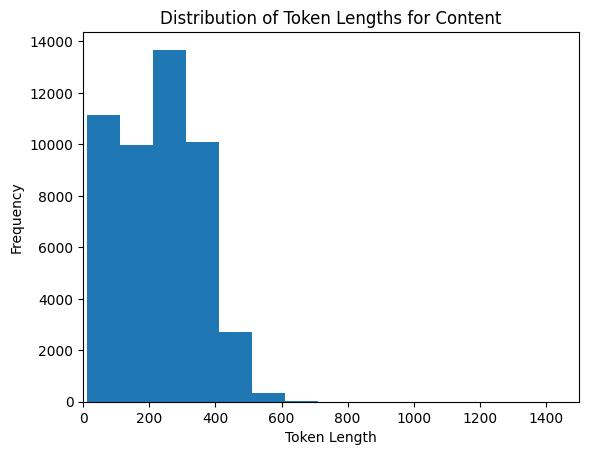

In [20]:
token_lengths = np.vectorize(len)(tokenized_train_df['Content'].values)
plt.hist(token_lengths, bins=10)

plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths for Content')

plt.xlim(0, 1500)

plt.show()

In [21]:
tokenizer.save_pretrained("/content/drive/MyDrive/data/tokenizer/train/")

('/content/drive/MyDrive/data/tokenizer/train/tokenizer_config.json',
 '/content/drive/MyDrive/data/tokenizer/train/special_tokens_map.json',
 '/content/drive/MyDrive/data/tokenizer/train/vocab.txt',
 '/content/drive/MyDrive/data/tokenizer/train/bpe.codes',
 '/content/drive/MyDrive/data/tokenizer/train/added_tokens.json')

- `valid_df`

In [22]:
val_df[cols] = val_df[cols].astype(str)
tokenized_val_df = tokenize_dataframe(val_df, cols)

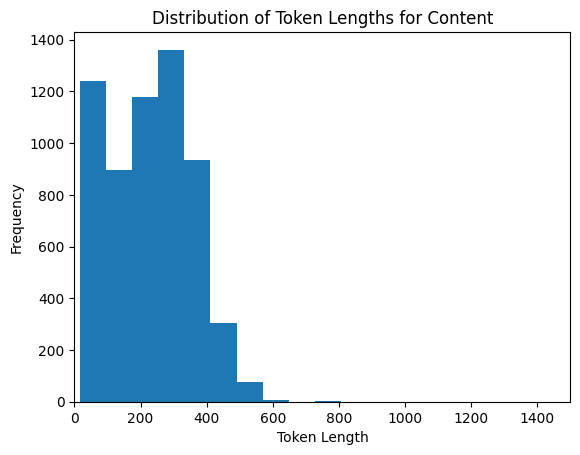

In [23]:
token_lengths = np.vectorize(len)(tokenized_val_df['Content'].values)
plt.hist(token_lengths, bins=10)

plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths for Content')

plt.xlim(0, 1500)

plt.show()

In [24]:
tokenizer.save_pretrained("/content/drive/MyDrive/data/tokenizer/valid/")

('/content/drive/MyDrive/data/tokenizer/valid/tokenizer_config.json',
 '/content/drive/MyDrive/data/tokenizer/valid/special_tokens_map.json',
 '/content/drive/MyDrive/data/tokenizer/valid/vocab.txt',
 '/content/drive/MyDrive/data/tokenizer/valid/bpe.codes',
 '/content/drive/MyDrive/data/tokenizer/valid/added_tokens.json')

- `test_df`

In [25]:
test_df[cols] = test_df[cols].astype(str)
tokenized_test_df = tokenize_dataframe(test_df, cols)

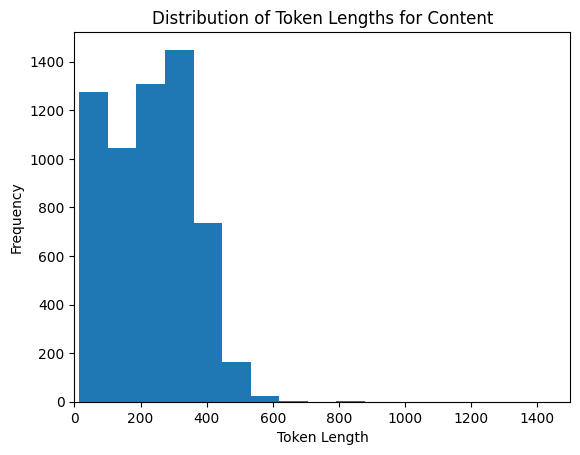

In [26]:
token_lengths = np.vectorize(len)(tokenized_test_df['Content'].values)
plt.hist(token_lengths, bins=10)

plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths for Content')

plt.xlim(0, 1500)

plt.show()

In [27]:
tokenizer.save_pretrained("/content/drive/MyDrive/data/tokenizer/test/")

('/content/drive/MyDrive/data/tokenizer/test/tokenizer_config.json',
 '/content/drive/MyDrive/data/tokenizer/test/special_tokens_map.json',
 '/content/drive/MyDrive/data/tokenizer/test/vocab.txt',
 '/content/drive/MyDrive/data/tokenizer/test/bpe.codes',
 '/content/drive/MyDrive/data/tokenizer/test/added_tokens.json')